In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


##### 1.Importing a DataFrame #####

In [2]:
df_train = pd.read_csv("../data/train.csv")
df_test =  pd.read_csv("../data/test.csv")

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


##### 2.Visualize the Data #####

In [4]:
df_train.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
5      0            330877   8.4583   NaN        Q  
6      0             17463  51.8625   E46        S  
7      1            349909  21.0750   NaN        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C

In [5]:
df_train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

Text(0.5, 0, '')

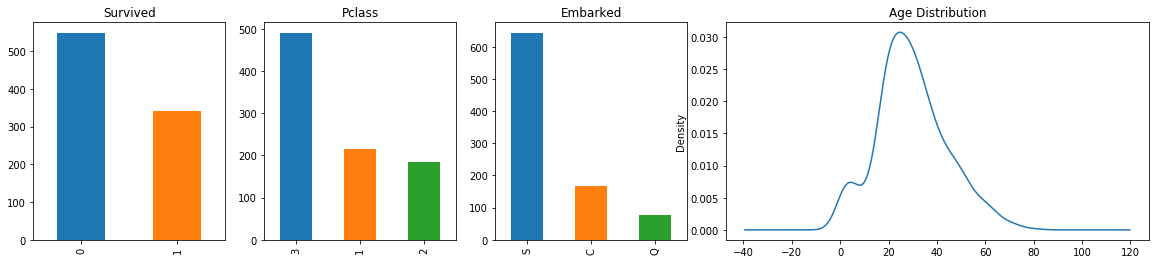

In [6]:
fig1 = plt.figure(figsize=(20,4))

#Survived
plt.subplot2grid((1,5),(0,0))
df_train['Survived'].value_counts().plot(kind="bar")
plt.title("Survived")

#Pclass
plt.subplot2grid((1,5),(0,1))
df_train['Pclass'].value_counts().plot(kind="bar")
plt.title("Pclass")

#Emarked
plt.subplot2grid((1,5),(0,2))
df_train.Embarked.value_counts().plot(kind='bar')
plt.title("Embarked")

#Age
plt.subplot2grid((1,5),(0,3), colspan=2)
df_train.Age.plot(kind="kde")
plt.title("Age Distribution")
plt.xlabel('')

/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


Text(0.5, 0, '')

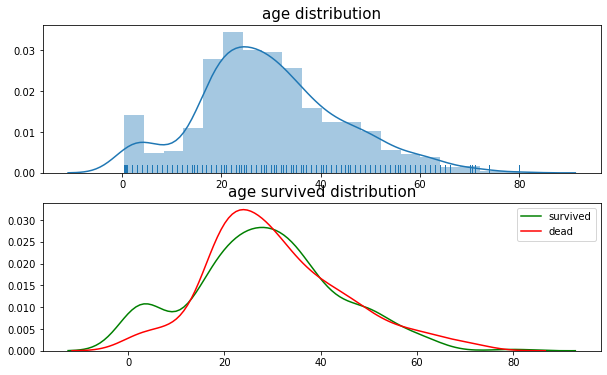

In [7]:
#Age&Survived
fig2, axes = plt.subplots(2,1,figsize=(10,6))

ax0 = axes[0]
sns.distplot(df_train[df_train.Age.notnull()].Age, rug=True, ax=axes[0])
ax0.set_title('age distribution',size=15)
ax0.set_xlabel('')

ax1 = axes[1]
sns.distplot(df_train[df_train.Survived==1][df_train.Age.notnull()].Age, hist=False, color='g', ax=ax1, label='survived')
sns.distplot(df_train[df_train.Survived==0][df_train.Age.notnull()].Age, hist=False, color='r', ax=ax1, label='dead')
ax1.set_title('age survived distribution',size=15)
ax1.set_xlabel('')

In [8]:
# survived_age=df_train[df_train.Survived==1].Age
# dead_age=df_train[df_train.Survived==0].Age
# age_frame=pd.concat([survived_age,dead_age],axis=1)  
# age_frame.columns=['survived','dead']  
# age_frame.plot(kind='hist',bins=30,alpha=0.3,figsize=(10,6))

<Figure size 432x288 with 0 Axes>

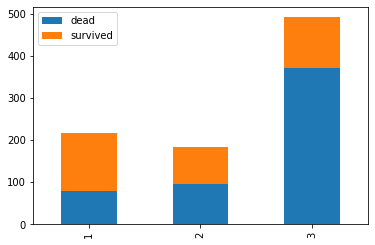

In [9]:
#Pclass&Survived
fig3 = plt.figure()
survived_0 = df_train.Pclass[df_train.Survived==0].value_counts()
survived_1 = df_train.Pclass[df_train.Survived==1].value_counts()
df_survived=pd.DataFrame({'survived':survived_1, 'dead':survived_0})
df_survived.plot(kind="bar", stacked=True)

<Figure size 432x288 with 0 Axes>

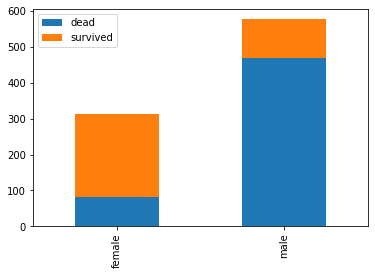

In [10]:
#Sex&Survived
fig4 = plt.figure()
survived_sex_0 = df_train.Sex[df_train.Survived==0].value_counts()
survived_sex_1 = df_train.Sex[df_train.Survived==1].value_counts()
df_sex_survived=pd.DataFrame({'survived':survived_sex_1, 'dead':survived_sex_0})
df_sex_survived.plot(kind="bar", stacked=True)

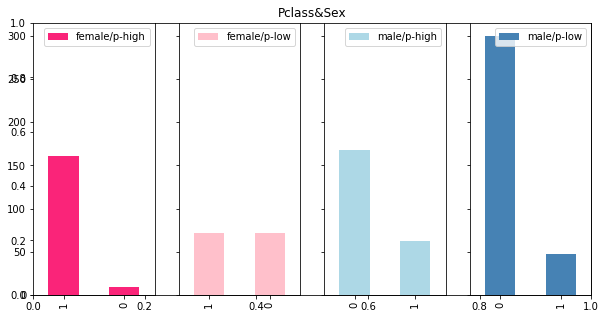

In [11]:
fig5=plt.figure(figsize=(10,5))
plt.title("Pclass&Sex")

ax1=fig5.add_subplot(141)
df_train.Survived[df_train.Sex == 'female'][df_train.Pclass != 3].value_counts().plot(kind='bar', label="female highclass", color='#FA2479')
# ax1.set_xticklabels(rotation=0)
ax1.legend(["female/p-high"], loc='best')

ax2=fig5.add_subplot(142, sharey=ax1)
df_train.Survived[df_train.Sex == 'female'][df_train.Pclass == 3].value_counts().plot(kind='bar', label='female, low class', color='pink')
# ax2.set_xticklabels(rotation=0)
plt.legend(["female/p-low"], loc='best')

ax3=fig5.add_subplot(143, sharey=ax1)
df_train.Survived[df_train.Sex == 'male'][df_train.Pclass != 3].value_counts().plot(kind='bar', label='male, high class',color='lightblue')
# ax3.set_xticklabels(rotation=0)
plt.legend(["male/p-high"], loc='best')

ax4=fig5.add_subplot(144, sharey=ax1)
df_train.Survived[df_train.Sex == 'male'][df_train.Pclass == 3].value_counts().plot(kind='bar', label='male low class', color='steelblue')
# ax4.set_xticklabels(rotation=0)
plt.legend(["male/p-low"], loc='best')

plt.show()

In [12]:
df_train.Survived[df_train.Sex == 'male'][df_train.Pclass == 3].value_counts()

0    300
1     47
Name: Survived, dtype: int64

/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


(0, 200)

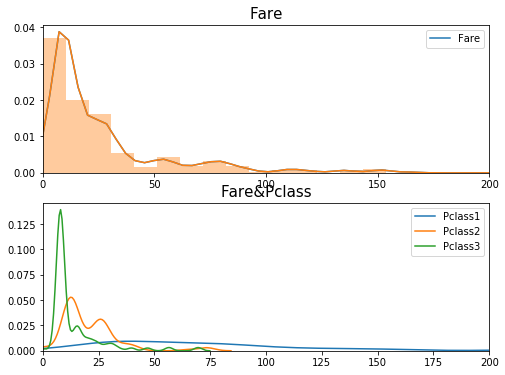

In [13]:
#Fare
fig6 = plt.figure(figsize=(8, 6))

ax0 = plt.subplot2grid((2,2), (0,0), colspan=2)
sns.kdeplot(df_train.Fare, ax=ax0)
sns.distplot(df_train.Fare, ax=ax0)
ax0.set_title('Fare', size=15)
ax0.set_xticks(range(0,250,50))
ax0.set_xlim([0, 200])
ax0.set_xlabel('')

ax1 = plt.subplot2grid((2,2), (1,0), colspan=2)
ax1.set_title('Fare&Pclass', size=15)
for i in range(1,4):
    sns.kdeplot(df_train[df_train.Pclass==i].Fare, ax=ax1, label='Pclass{0}'.format(i))
ax1.set_xlim([0,200])

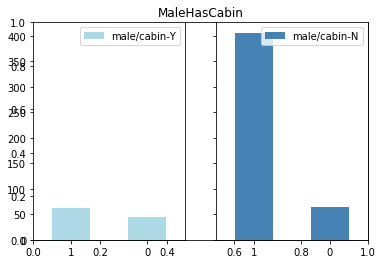

In [14]:
fig7=plt.figure()
plt.title("MaleHasCabin")

ax1=fig7.add_subplot(121)
df_train.Survived[df_train.Sex == 'male'][df_train.Cabin.notnull()].value_counts().plot(kind='bar', label="male cabin n", color='lightblue')
ax1.set_xticklabels(["1", "0"], rotation=0)
ax1.legend(["male/cabin-Y"], loc='best')

ax2=fig7.add_subplot(122, sharey=ax1)
df_train.Survived[df_train.Sex == 'male'][df_train.Cabin.isnull()].value_counts().plot(kind='bar', label='male, cabin y', color='steelblue')
ax2.set_xticklabels(["1", "0"], rotation=0)
plt.legend(["male/cabin-N"], loc='best')

plt.show()

<Figure size 432x288 with 0 Axes>

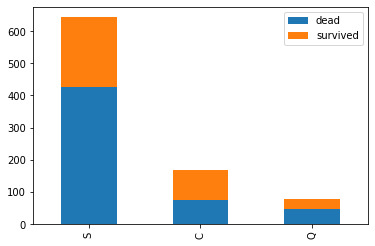

In [15]:
#Embarked&Survived
fig8 = plt.figure()

survived_embarked_1 = df_train.Embarked[df_train.Survived==1].value_counts()
survived_embarked_0 = df_train.Embarked[df_train.Survived==0].value_counts()

df_survived_embarked = pd.DataFrame({'survived':survived_embarked_1,'dead':survived_embarked_0})
df_survived_embarked.plot(kind="bar",stacked=True)

<Figure size 432x288 with 0 Axes>

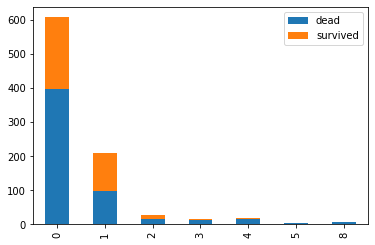

In [16]:
#SibSp&Survived
fig9 = plt.figure()

survived_sibsp_1 = df_train[df_train.Survived==1].SibSp.value_counts()
survived_sibsp_0 = df_train[df_train.Survived==0].SibSp.value_counts()

df_survived_sibSp = pd.DataFrame({'survived':survived_sibsp_1,'dead':survived_sibsp_0})
df_survived_sibSp.plot(kind="bar",stacked=True)

<Figure size 432x288 with 0 Axes>

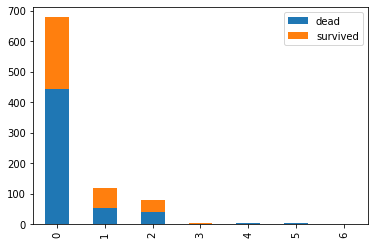

In [17]:
#Parch&Survived
fig10 = plt.figure()

survived_parch_1 = df_train[df_train.Survived==1].Parch.value_counts()
survived_parch_0 = df_train[df_train.Survived==0].Parch.value_counts()

df_survived_parch = pd.DataFrame({'survived':survived_parch_1,'dead':survived_parch_0})
df_survived_parch.plot(kind="bar",stacked=True)

<Figure size 432x288 with 0 Axes>

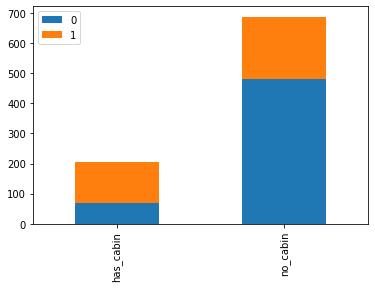

In [18]:
#Cabin&Survived
fig11 = plt.figure()
survived_no_cabin = df_train.Survived[pd.isnull(df_train.Cabin)].value_counts()
survived_has_cabin = df_train.Survived[pd.notnull(df_train.Cabin)].value_counts()

df_cabin = pd.DataFrame({'no_cabin':survived_no_cabin,'has_cabin':survived_has_cabin})
df_cabin_survived = df_cabin.T
df_cabin_survived.plot.bar(stacked=True)

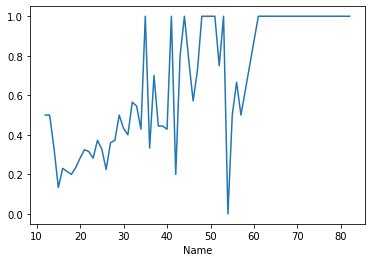

In [19]:
#NameLen
df_train.groupby(df_train.Name.apply(lambda x: len(x)))['Survived'].mean().plot()

##### 3.Cleanup and Transform the Data(Feature Engineering) #####

In [20]:
#set missing age method
from sklearn.ensemble import RandomForestRegressor

def set_missing_age(df):
    age_df = df[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
    #  df.values　→ Return a Numpy representation of the DataFrame.(version 0.23: to_numpy() is recommended)
    #  print(age_df.values)
    # df.as_matrix()→ transfer dataframe to numpy(version 0.23.0: Use DataFrame.values() instead.)
    known_age = age_df[age_df.Age.notnull()].as_matrix()
    unknown_age = age_df[age_df.Age.isnull()].as_matrix()
    # y_target（column_1 age）
    y = known_age[:, 0]
    # X_Features（column_2~N）
    X = known_age[:, 1:]
    
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(X, y)
    predictedAges = rfr.predict(unknown_age[:, 1:])
    
    df.loc[ (df.Age.isnull()), 'Age' ] = predictedAges 
    
    return df,rfr

In [21]:
def age_bins(age):
    if age<=6:
        return "Child"
    if age>6 and age<= 18:
        return "Youth"
    if age > 18 and age<= 35:
        return "Teenage"
    if age > 35 and age <= 60:
        return "Middle"
    else:
        return "Old"

In [22]:
#set missing cabin method-1
def set_missing_cabin(df):
    df.loc[(df['Cabin'].notnull()), 'Cabin'] = "Yes"
    df.loc[(df['Cabin'].isnull()), 'Cabin'] = "No"
    return df

In [23]:
#extract prefix of cabin when cabin is not null
import math
def get_cabin_prefix(cabin):
    if str(cabin) != 'nan':
        return str(cabin)[0:1]

In [24]:
#Cabin&Male
def get_MaleHasCabin(sex,cabin):
    if sex== 'male' and cabin !='U':
        return 1
    else:
        return 0

In [25]:
#set missing cabin method-2
def get_cabin_no(s):
    cabinno = s[1:]
    if ' ' in cabinno:
        cabinno =  cabinno.split(sep=' ')[0]
    if ' ' in cabinno or cabinno=='':
            cabinno = 0
    return int(cabinno)

def set_cabin_type2(df):
    df['Cabin_1']=df.loc[df['Cabin'].notna(),'Cabin'].apply(lambda x: x[0:1])
    df['Cabin_2']=df.loc[df['Cabin'].notna(),'Cabin'].apply(lambda x: get_cabin_no(x))
    df.loc[(df['Cabin_2'].isnull()),'Cabin_2']=0
    return df

In [26]:
#add child feature
def add_child(age):
    child_flg = 0
    if age <=12:
        child_flg= 1
    return child_flg

In [27]:
#add mother feature
def add_mother(title, parch):
    mother_flg = 0
    if title=='Mrs' and parch>0:
        mother_flg =1
    return mother_flg

In [28]:
# Sex&Pclass
def get_female_highclass(sex, pclass):
    flg = 0
    if sex=='female' and pclass!=3:
        flg = 1
    return flg

def get_male_lowclass(sex, pclass):
    flg = 0
    if sex=='male' and pclass==3:
        flg = 1
    return flg

In [29]:
# extract prefix of title
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}

def get_titles(df):
    df['Title'] = df['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    df['Title'] = df.Title.map(Title_Dictionary)
    return df

In [30]:
#add feature family category 
def family_size_category(family_size):
    if family_size <= 1:
        return 'Single'
    elif family_size <= 4:
        return 'Small'
    else:
        return 'Large'

In [31]:
#add feature ticket category
def ticket_category(ticket):
    ticket = ticket.replace('.', '')
    ticket = ticket.replace('/', '')
    ticket = ticket.split()
    ticket = map(lambda t : t.strip(), ticket)
    ticket = list(filter(lambda t : not t.isdigit(), ticket))
    if len(ticket) > 0:
        return ticket[0]
    else: 
        return 'XXX'

In [32]:
#combine train data and test data
df_test['Survived'] = 0
df_combine=pd.concat([df_train,df_test])
df_combine.shape

(1309, 12)

In [33]:
# Process Fare
df_combine.Fare.fillna(df_combine.Fare.mean(), inplace=True)

df_combine['GroupTicket'] = df_combine['Fare'].groupby(by=df_combine['Ticket']).transform('count')
df_combine['Fare'] = df_combine['Fare'] / df_combine['GroupTicket']
df_combine.drop(['GroupTicket'], axis=1, inplace=True)

def fare_category(fare):
    if fare <= 8:
        return 1
    elif fare <= 26:
        return 2
    else:
        return 3

df_combine['FareCategory'] = df_combine['Fare'].map(fare_category)

#Fare→Log
# df_combine['Fare'] = df_combine.Fare.apply(lambda x: np.log(x)  if x!=0 else x)

In [34]:
# Process Ticket
df_combine['Ticket'] = df_combine['Ticket'].map(ticket_category)


In [35]:
#Process Age 
df_combine,rfr = set_missing_age(df_combine)
# df_combine['AgeCategory'] = pd.cut(df_combine['Age'],5)
# combine_df = combine_df.drop('Age',axis=1)

In [36]:
#Process Cabin
# Fillna Cabin
df_combine = set_missing_cabin(df_combine)
#Extract prefix from cabin
# df_combine['Cabin'] = df_combine['Cabin'].apply(lambda x : get_cabin_prefix(x))

In [37]:
#Fillna Embarked
df_combine.loc[df_combine['Embarked'].isnull(),'Embarked'] = df_combine['Embarked'].mode()[0]

In [38]:
#Add Feature Sex&Pclass
# df_combine['FemaleHighClass'] =  df_combine.apply(lambda x: get_female_highclass(x.Sex,x.Pclass), axis=1)
# df_combine['MaleLowClass'] =  df_combine.apply(lambda x: get_male_lowclass(x.Sex,x.Pclass), axis=1)

In [39]:
# Add Feature FamilyCategory(Parch+SibSp)
from sklearn import preprocessing
df_combine['FamilySize'] = df_combine['Parch'] + df_combine['SibSp'] + 1
df_combine['FamilyCategory'] = df_combine['FamilySize'].map(family_size_category)

In [40]:
#Add Feature Title
# # 第一次extract处理是：匹配正则表达式中的“，”的位置，并将“（）”括号中的部分抽出来，在下式中也就是“，” Name字段里“逗号”后面的部分截取留下来
# #第二次extract处理是：匹配正则表达式中的“.”的位置，并将“（）”括号中的部分抽出来，在下式中也就是“.”Name字段里点前面的部分截取留下来
# #（）代表匹配后被留下里的部分
# df_combine['Title'] = df_combine['Name'].str.extract('.+,(.+)').str.extract( '^(.+?)\.').str.strip()
# df_combine['Title'] = df_combine['Title'].map(create_title_dict())

df_combine = get_titles(df_combine)

In [41]:
#Add Feature Child 
df_combine['Child'] = df_combine['Age'].apply(lambda x: add_child(x))

In [42]:
#Add Feature Mother
df_combine['Mother'] = df_combine.apply(lambda x: add_mother(x.Title,x.Parch), axis=1)

In [43]:
#Add feature Cabin&Male
# df_combine['MaleHasCabin'] =df_combine.apply(lambda x : get_MaleHasCabin(x.Sex,x.Cabin),axis=1)

In [44]:
#DeadFemaleFamily & SurviveMaleFamily
df_combine['Surname'] = df_combine['Name'].apply(lambda x:x.split(',')[0])
dead_female_surname = list(set(df_combine[(df_combine.Sex=='female') & (df_combine.Age>=12)
                              & (df_combine.Survived==0) & ((df_combine.Parch>0)  | (df_combine.SibSp > 0))]['Surname'].values))
survive_male_surname = list(set(df_combine[(df_combine.Sex=='male') & (df_combine.Age>=12)
                              & (df_combine.Survived==1) & ((df_combine.Parch>0)  | (df_combine.SibSp > 0))]['Surname'].values))

# print(dead_female_surname)
# print(survive_male_surname)

df_combine['DeadFemaleFamily'] = np.where(df_combine['Surname'].isin(dead_female_surname),0,1)
df_combine['SurviveMaleFamily'] = np.where(df_combine['Surname'].isin(survive_male_surname),0,1)
# df_combine = df_combine.drop(['Name','Surname'],axis=1)

In [45]:
#Name_length
df_combine['NameLen'] = df_combine['Name'].apply(lambda x: len(x))
df_combine['NameLen'] = pd.qcut(df_combine['NameLen'],5)

# features = combine_df.drop(["PassengerId","Survived"], axis=1).columns
le = LabelEncoder()
# for feature in features:
le = le.fit(df_combine['NameLen'])
df_combine['NameLen'] = le.transform(df_combine['NameLen'])

In [46]:
#Extracting dummy variables
#one-hot encoding
dummy_Cabin = pd.get_dummies(df_combine.Cabin,  prefix="Cabin")
dummy_Embarked = pd.get_dummies(df_combine['Embarked'],  prefix="Embarked")
dummy_Sex = pd.get_dummies(df_combine['Sex'], prefix="Sex")
dummy_Pclass =pd.get_dummies(df_combine['Pclass'], prefix="Pclass")
dummy_Title =pd.get_dummies(df_combine['Title'], prefix="Title")
dummy_FamilyCategory = pd.get_dummies(df_combine['FamilyCategory'],prefix="FamilyCategory")
dummy_FareCategory = pd.get_dummies(df_combine['FareCategory'],prefix="FareCategory")
# dummy_AgeCategory = pd.get_dummies(df_combine['AgeCategory'],prefix="AgeCategory")
dummy_Ticket =pd.get_dummies(df_combine['Ticket'], prefix="Ticket")

In [47]:
df_combine= pd.concat([df_combine, dummy_Cabin,dummy_Embarked,dummy_Sex,dummy_Pclass,dummy_Title,dummy_FamilyCategory,dummy_FareCategory,dummy_Ticket]
                      , axis=1)
df_combine.shape

(1309, 81)

<Figure size 432x288 with 0 Axes>

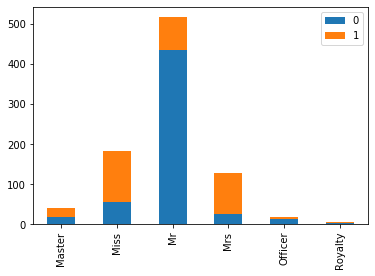

In [48]:
#Title&Survived
fig7 = plt.figure()

df_train_fig = df_combine[:891]

survived_title_0 = df_train_fig.Title[df_train_fig.Survived==0].value_counts()
survived_title_1 = df_train_fig.Title[df_train_fig.Survived==1].value_counts()

df_survived_title = pd.DataFrame({'0':survived_title_0,'1':survived_title_1})
df_survived_title.plot(kind="bar",stacked=True)

In [49]:
#Scaler
import sklearn.preprocessing as preprocessing
scaler = preprocessing.StandardScaler()

# df_combine['Age_scaled']= scaler.fit(df_combine[['Age']]) .transform(df_combine[['Age']])
# df_combine['Fare_scaled'] = scaler.fit(df_combine[['Fare']]).transform(df_combine[['Fare']])

##### 4.Split Training and Test Sets #####

In [50]:
#Properity
prop_regex = 'Survived|Sex_.*|FamilyCategory_.*|FareCategory_.*|Cabin_.*|Pclass_.*|Title_.*|Embarked_.*|Child|Mother|DeadFemaleFamily|SurviveMaleFamily|NameLen'
df_combine_filter = df_combine.filter(regex=prop_regex)

cols = list(df_combine_filter)
# move the column to head of list using index, pop and insert
cols.insert(0, cols.pop(cols.index('Survived')))
# reorder
df_combine_filter = df_combine_filter.loc[:, cols]
print(df_combine.shape)
print(df_combine_filter.shape)
print(df_combine_filter.columns)

df_train_new = df_combine_filter[ :891]
df_test_new = df_combine_filter[ 891:]

train_X = df_train_new.drop(columns=['Survived'])
train_Y = df_train_new['Survived']

test_X = df_test_new.drop(columns=['Survived'])

(1309, 81)
(1309, 28)
Index(['Survived', 'Child', 'Mother', 'DeadFemaleFamily', 'SurviveMaleFamily',
       'NameLen', 'Cabin_No', 'Cabin_Yes', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Officer', 'Title_Royalty', 'FamilyCategory_Large',
       'FamilyCategory_Single', 'FamilyCategory_Small', 'FareCategory_1',
       'FareCategory_2', 'FareCategory_3'],
      dtype='object')


In [51]:
# print(df_combine_filter[['Sex_female','Survived']].corr())
# print(df_combine_filter[['Title_Master','Survived']].corr())

##### 4.Feature Selection ##### 

In [52]:
select_clf = RandomForestRegressor(n_estimators=50, max_features='sqrt')
select_clf.fit(train_X, train_Y)

features = pd.DataFrame()
features['feature'] = train_X.columns
features['importance'] = select_clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

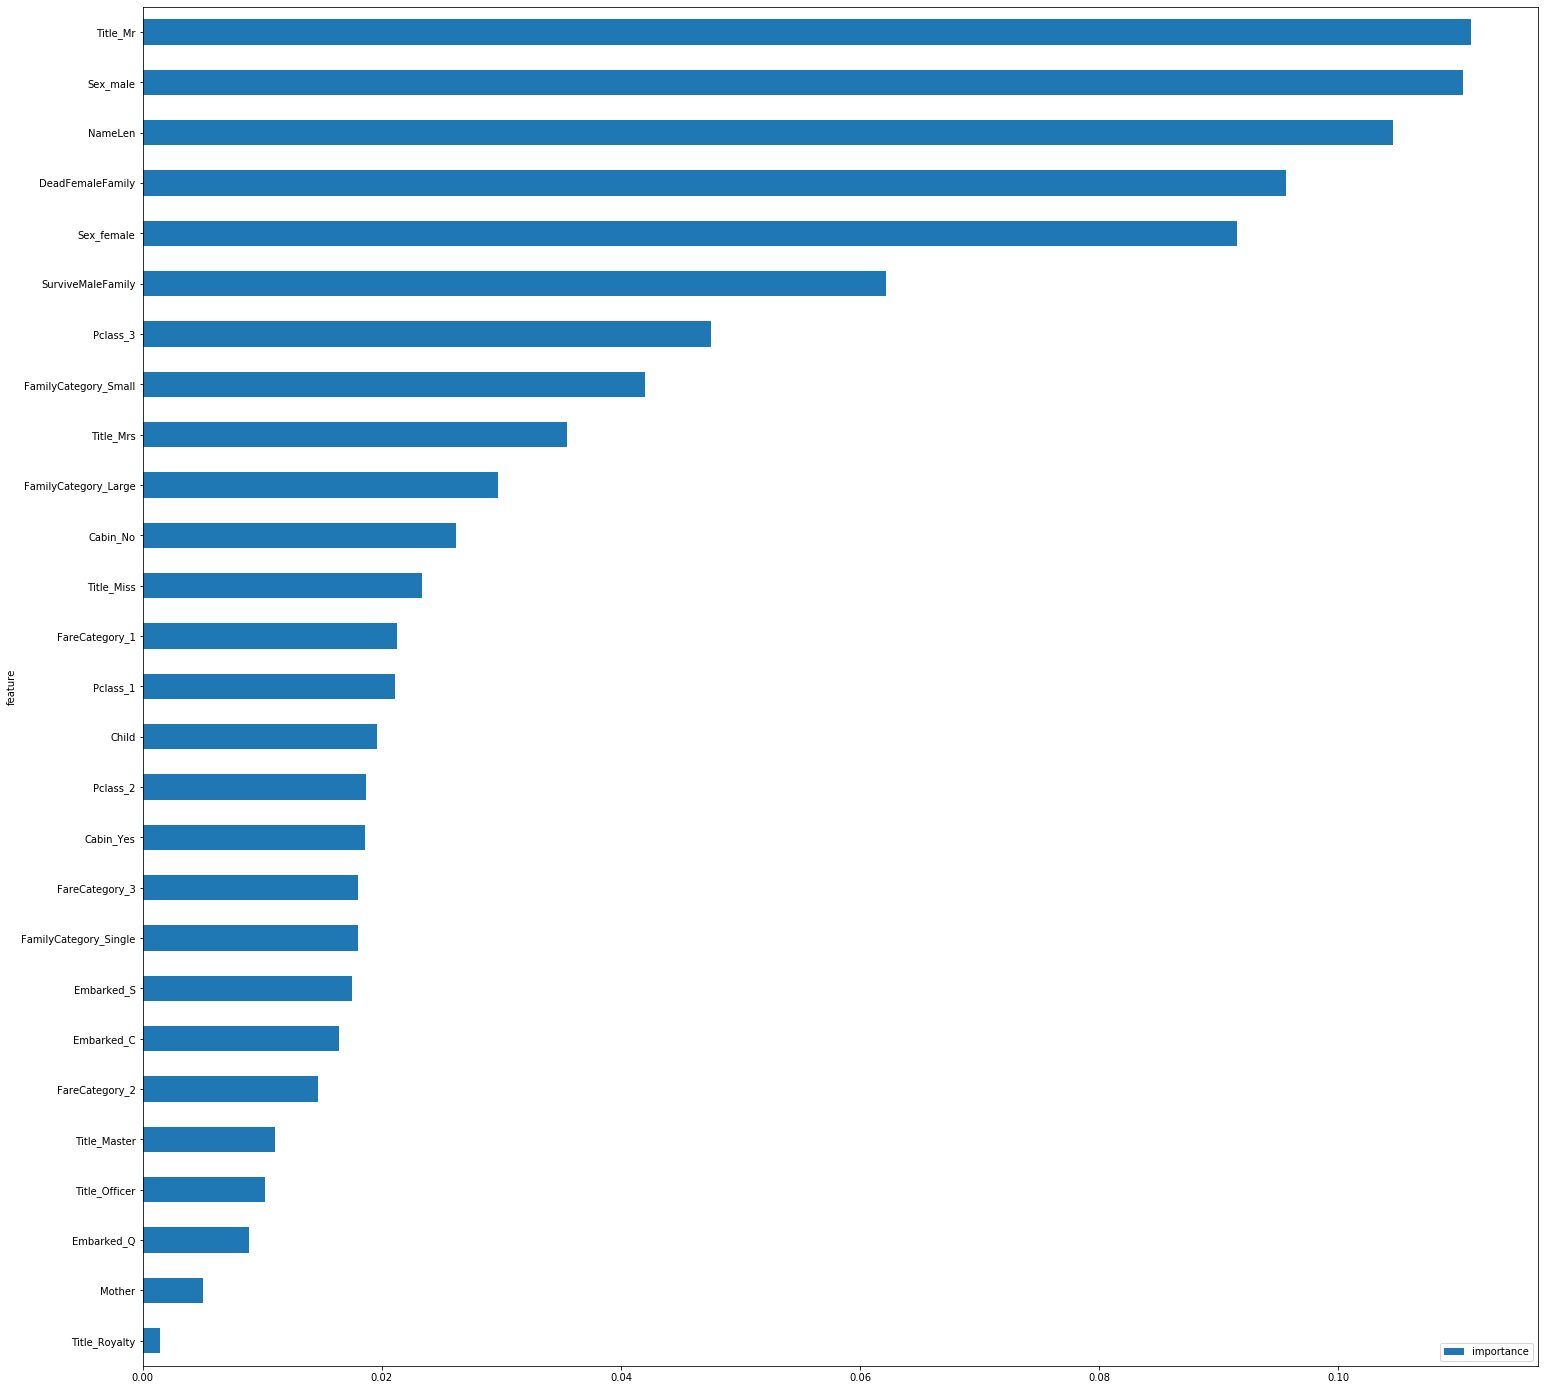

In [53]:
features.plot(kind='barh', figsize=(25, 25))

In [54]:
from sklearn.feature_selection import SelectFromModel

model = SelectFromModel(select_clf, prefit=True,threshold=0.0)
recude_train= model.transform(train_X)
# print(model.threshold)
print(recude_train.shape)

(891, 27)


In [55]:
recude_test = model.transform(test_X)
recude_test.shape

(418, 27)


##### 5. Cross Validate with KFold #####

In [56]:
#cross validation

train_data = df_combine[ :891]
cross_train,cross_test= train_test_split(train_data, test_size=0.3, random_state=0)

cross_train_filter = cross_train.filter(regex=prop_regex)
cross_test_filter = cross_test.filter(regex=prop_regex)

y_cross_train = cross_train_filter['Survived'].values
y_cross_test = cross_test_filter['Survived'].values

cross_train_filter.drop(columns=['Survived'],inplace=True)
cross_test_filter.drop(columns=['Survived'],inplace=True)
X_cross_train = model.transform(cross_train_filter)
X_cross_test = model.transform(cross_test_filter)

clf_cross = LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
clf_cross.fit(X_cross_train, y_cross_train)
predictions = clf_cross.predict(X_cross_test)

result = pd.DataFrame({'PassengerId':cross_test['PassengerId'].as_matrix(), 'SurvivedRlt':predictions.astype(np.int32)})

#Print bad cases
all_test = pd.concat([cross_test.reset_index(drop=True),result.reset_index(drop=True)],axis=1)
bad_cases = all_test.loc[all_test['Survived']!=all_test['SurvivedRlt'],:]
bad_cases

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


Age Cabin Embarked       Fare  \
5    41.299781   Yes        S  30.500000   
11   40.000000    No        S  13.000000   
15   14.000000    No        S   7.854200   
24   22.000000    No        S   9.837500   
33   42.986540   Yes        S  35.500000   
35   32.000000   Yes        C  30.500000   
47   18.000000   Yes        C  37.482143   
50   38.314627   Yes        S  30.000000   
52    4.000000    No        S   7.666667   
54   46.966304   Yes        C  29.700000   
59   33.309902    No        Q   7.750000   
67   28.000000    No        S  11.000000   
77   40.000000    No        C  27.720800   
82   26.000000    No        S  13.000000   
99   27.000000   Yes        C  25.576400   
101  54.000000    No        S  13.000000   
104  29.000000   Yes        S   5.231250   
112  32.000000    No        S   7.061975   
113  29.461271    No        S   8.050000   
120  29.678423    No        S   7.061975   
130  21.000000    No        Q   7.750000   
143  18.000000    No        Q   6.750000   
145  24.000000    No        S   8.850000   
152  37.000000    No        S   9.587500   
157  62.000000    No        S  10.500000   
158  32.720083    No        Q   7.750000   
161  20.000000    No        C   7.229200   
189  25.000000    No        S  15.000000   
198  34.000000    No        S  26.550000   
200  18.000000    No        S   8.050000   
204  19.000000    No        S   8.050000   
217   1.000000    No        S   5.143750   
221  21.000000   Yes        C  37.482143   
224  17.000000    No        S   7.925000   
228  25.000000    No        S   0.000000   
231  24.000000    No        S  13.000000   
233  22.000000    No        S  10.516700   
246  22.758089    No        Q   8.137500   
252  49.000000   Yes        C  27.720825   
257  45.000000    No        S   8.050000   

                                           Name  Parch PassengerId  Pclass  \
5                         Saalfeld, Mr. Adolphe      0         299       1   
11                    Smith, Miss. Marion Elsie      0         347       2   
15         Vestrom, Miss. Hulda Amanda Adolfina      0          15       3   
24                  Strandberg, Miss. Ida Sofia      0         475       3   
33                            Woolner, Mr. Hugh      0          56       1   
35                    Stahelin-Maeglin, Dr. Max      0         633       1   
47                   Ryerson, Miss. Emily Borie      2         312       1   
50                  Hawksford, Mr. Walter James      0         741       1   
52                            Wells, Miss. Joan      1         751       2   
54                         Marechal, Mr. Pierre      0         840       1   
59                           McCoy, Mr. Bernard      0         302       3   
67                            Harper, Rev. John      1         849       2   
77                     Uruchurtu, Don. Manuel E      0          31       1   
82        Lahtinen, Mrs. William (Anna Sylfven)      1         313       2   
99                           Hassab, Mr. Hammad      0         682       1   
101               Carter, Rev. Ernest Courtenay      0         250       2   
104  Strom, Mrs. Wilhelm (Elna Matilda Persson)      1         252       3   
112                             Chip, Mr. Chang      0         839       3   
113              Meanwell, Miss. (Marion Ogden)      0         565       3   
120                             Foo, Mr. Choong      0         644       3   
130                         Canavan, Miss. Mary      0         502       3   
143                Hegarty, Miss. Hanora "Nora"      0         655       3   
145                         Haas, Miss. Aloisia      0         294       3   
152              Laitinen, Miss. Kristina Sofia      0         504       3   
157                          Harris, Mr. George      0         571       2   
158                          Henry, Miss. Delia      0         265       3   
161                       Barah, Mr. Hanna Assi      0         763       3   
189                 Ch

##### 6.Modeling##### 

In [58]:
y = train_Y.values
X = recude_train

In [59]:
logreg = LogisticRegression()
random_forest = RandomForestClassifier(n_estimators=300,min_samples_leaf=4,class_weight={0:0.745,1:0.255})
gbdt = GradientBoostingClassifier(n_estimators=500,learning_rate=0.03,max_depth=3)
xgb = XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.03)
clfs = [logreg, random_forest, gbdt, xgb]
ename = ["LR","random_forest","GBDT","xgbGBDT"]

y_cross = train_Y.values
X_cross = recude_train

cv_results = []
for classifier in clfs :
    cv_results.append(cross_val_score(classifier, X_cross, y =y_cross, scoring = "accuracy", cv = 10, n_jobs=4))

for i in range(0,len(cv_results)):
    print("{0} :{1}".format(ename[i],cv_results[i].mean()))
#     clfs[i].fit(X,y)
#     coef=pd.DataFrame({"columns":list(train_X.columns), "coef":list(clfs[i].coef_[0].T)}) 
#     coef.sort_values(by='coef', ascending=False)
#     print(coef)

LR :0.852955112927023
random_forest :0.8608466689365566
GBDT :0.8820687209170355
xgbGBDT :0.8708449665191239


In [60]:
from sklearn.metrics import precision_score

class Bagging(object):
    
    def __init__(self,estimators):
        self.estimator_names = []
        self.estimators = []
        for i in estimators:
            self.estimator_names.append(i[0])
            self.estimators.append(i[1])
        self.clf = LogisticRegression()
    
    def fit(self, train_x, train_y):
        for i in self.estimators:
            i.fit(train_x,train_y)
        x = np.array([i.predict(train_x) for i in self.estimators]).T
        y = train_y
        self.clf.fit(x, y)
    
    def predict(self,x):
        x = np.array([i.predict(x) for i in self.estimators]).T
        #print(x)
        return self.clf.predict(x)
        
    
    def score(self,x,y):
        s = precision_score(y,self.predict(x))
        #print(s)
        return s

In [61]:
clfs = [logreg, random_forest, gbdt, xgb]

bag = Bagging([('lr',logreg),("rm", random_forest),('gbdt',gbdt), ('xgb',xgb)])
bag.fit(X, y)

predictions = bag.predict(recude_test).astype(int)
result = pd.DataFrame({'PassengerId':df_test['PassengerId'].as_matrix(), 'Survived':predictions.astype(np.int32)})
result.to_csv("../data/bg_predictions.csv", index=False)

In [62]:
#LogisticRegression
# clf = LogisticRegression(C=1.0, penalty='l1', tol=1e-6)

# clf.fit(X, y)

# predictions = clf.predict(recude_test)
# result = pd.DataFrame({'PassengerId':df_test['PassengerId'].as_matrix(), 'Survived':predictions.astype(np.int32)})
# result.to_csv("../data/lr_predictions.csv", index=False)

In [63]:
# coef=pd.DataFrame({"columns":list(train_X.drop(columns=['Survived']).columns), "coef":list(clf.coef_[0].T)})

# coef=pd.DataFrame({"columns":list(train_X.columns), "coef":list(clf.coef_[0].T)})
# coef.sort_values(by='coef', ascending=False)

In [64]:
# #XGBClassifier
# xgc=XGBClassifier()
# xgc_param = {
#     'n_estimators': range(30, 300, 50),
#     'max_depth': range(2, 7, 1),
#     'learning_rate': [0.03]
# }

# # xgb = XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.03)

# gc=GridSearchCV(xgc,param_grid=xgc_param,cv=5)
# gc.fit(X,y)

# y_cross = train_Y.values
# X_cross = recude_train

# cross_rlt = cross_validation.cross_val_score(gc, X_cross, y_cross, cv=5)
# print(cross_rlt)
# print(cross_rlt.mean())

# predictions=gc.predict(recude_test)
# print(gc.score(X,y))
# print(gc.best_score_)
# # print(gc.best_estimator_)

# result = pd.DataFrame({'PassengerId':df_test['PassengerId'].as_matrix(), 'Survived':predictions.astype(np.int32)})
# result.to_csv("../data/xgc_predictions.csv", index=False)

In [65]:
# xgb = XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.03)
# xgb.fit(X,y)

# predictions=xgb.predict(recude_test)
# result = pd.DataFrame({'PassengerId':df_test['PassengerId'].as_matrix(), 'Survived':predictions.astype(np.int32)})
# result.to_csv("../data/xgc_predictions.csv", index=False)

In [66]:
# gboost = GradientBoostingClassifier()
# y_cross = train_Y.values
# X_cross = recude_train

# cross_rlt = cross_validation.cross_val_score(gboost, X_cross, y_cross, cv=5)
# print(cross_rlt)
# print(cross_rlt.mean())

# gboost = GradientBoostingClassifier()
# gboost.fit(X,y)

# recude_test = model.transform(test_X)
# predictions = gboost.predict(recude_test)

# result = pd.DataFrame({'PassengerId':df_test['PassengerId'].as_matrix(), 'Survived':predictions.astype(np.int32)})
# result.to_csv("../data/gboost_predictions.csv", index=False)